<a href="https://colab.research.google.com/github/natgoodrich371/CS-4650_Goodrich-Stock-Updates/blob/main/Nathan_Goodrich_Stock_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this second week, I explored another method of predicting stock prices based off some of the suggestions of my classmates, so I began using a linear regression model to predict the Open prices over the next two weeks. I analyzed three stocks in particular so I could see the effect that Black Friday and Cyber Monday had: Walmart, Apple, and Target. They all showed promise for the next couple of weeks.

1. Sold my Sony stock. It peaked around the end of last week before plummetting again. The theory that the new trailer and movie would increase its stock (at least temporarily) panned out.

2. Bought Walmart stock prior to the evaluation, expecting an increase after being strangely low over the past few weeks.

3. Bought Target stock for similar reasons.

4. Bought Tesla stock after noticing how much of an increase the stock has had over the past couple of weeks, so decided to take my chance.

In [21]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('bmh')
uploaded = files.upload()

Saving wmt_data.csv to wmt_data (3).csv


In [22]:
import io
data = pd.read_csv(io.BytesIO(uploaded['wmt_data.csv']))
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/30/2020,151.600006,152.949997,150.100006,152.789993,150.453873,10898500
1,12/1/2020,153.600006,153.660004,151.660004,152.639999,150.306168,7645100
2,12/2/2020,152.000000,152.619995,149.529999,150.520004,148.218597,7849000
3,12/3/2020,150.279999,150.279999,148.389999,149.300003,147.017258,8575300
4,12/4/2020,149.509995,149.509995,147.580002,148.910004,146.633224,6963100


In [23]:
print(data.shape)

(251, 7)


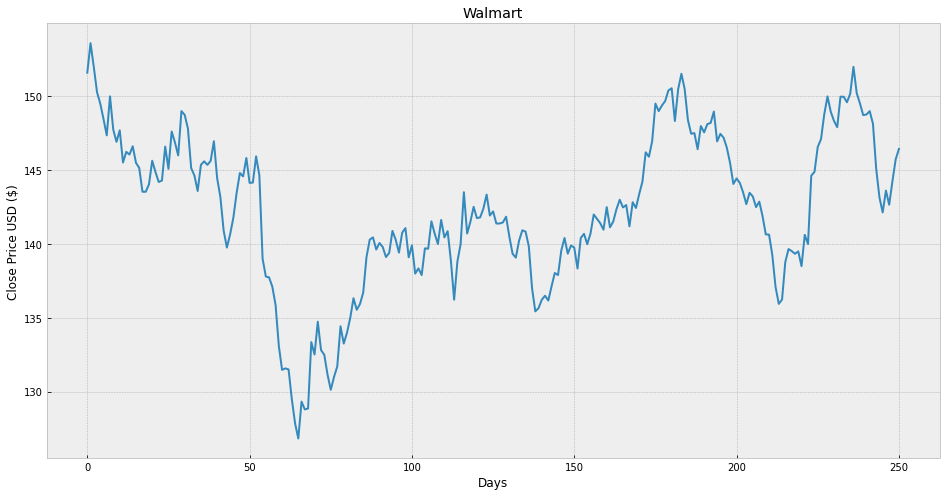

In [24]:
plt.figure(figsize=(16,8))
plt.title('Walmart')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Open'])
plt.show()

In [25]:
test = data[['Open']]

In [26]:
coming_up = 14
test['Prediction'] = test[['Open']].shift(-coming_up)
print(test.head(30))

          Open  Prediction
0   151.600006  146.619995
1   153.600006  145.500000
2   152.000000  145.149994
3   150.279999  143.539993
4   149.509995  143.539993
5   148.460007  144.039993
6   147.360001  145.639999
7   150.000000  144.880005
8   147.750000  144.199997
9   146.919998  144.300003
10  147.699997  146.600006
11  145.520004  145.089996
12  146.240005  147.619995
13  146.059998  146.880005
14  146.619995  146.000000
15  145.500000  149.000000
16  145.149994  148.750000
17  143.539993  147.820007
18  143.539993  145.139999
19  144.039993  144.639999
20  145.639999  143.589996
21  144.880005  145.360001
22  144.199997  145.600006
23  144.300003  145.360001
24  146.600006  145.630005
25  145.089996  146.960007
26  147.619995  144.460007
27  146.880005  143.179993
28  146.000000  140.910004
29  149.000000  139.759995


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
print(x)

[[151.600006]
 [153.600006]
 [152.      ]
 [150.279999]
 [149.509995]
 [148.460007]
 [147.360001]
 [150.      ]
 [147.75    ]
 [146.919998]
 [147.699997]
 [145.520004]
 [146.240005]
 [146.059998]
 [146.619995]
 [145.5     ]
 [145.149994]
 [143.539993]
 [143.539993]
 [144.039993]
 [145.639999]
 [144.880005]
 [144.199997]
 [144.300003]
 [146.600006]
 [145.089996]
 [147.619995]
 [146.880005]
 [146.      ]
 [149.      ]
 [148.75    ]
 [147.820007]
 [145.139999]
 [144.639999]
 [143.589996]
 [145.360001]
 [145.600006]
 [145.360001]
 [145.630005]
 [146.960007]
 [144.460007]
 [143.179993]
 [140.910004]
 [139.759995]
 [140.660004]
 [141.789993]
 [143.460007]
 [144.809998]
 [144.580002]
 [145.830002]
 [144.139999]
 [144.160004]
 [145.940002]
 [144.649994]
 [139.      ]
 [137.800003]
 [137.740005]
 [137.110001]
 [135.869995]
 [133.100006]
 [131.479996]
 [131.580002]
 [131.509995]
 [129.5     ]
 [127.860001]
 [126.830002]
 [129.330002]
 [128.800003]
 [128.860001]
 [133.360001]
 [132.520004]
 [134.

In [29]:
y = np.array(test['Prediction'])[:-coming_up]
print(y)

[146.619995 145.5      145.149994 143.539993 143.539993 144.039993
 145.639999 144.880005 144.199997 144.300003 146.600006 145.089996
 147.619995 146.880005 146.       149.       148.75     147.820007
 145.139999 144.639999 143.589996 145.360001 145.600006 145.360001
 145.630005 146.960007 144.460007 143.179993 140.910004 139.759995
 140.660004 141.789993 143.460007 144.809998 144.580002 145.830002
 144.139999 144.160004 145.940002 144.649994 139.       137.800003
 137.740005 137.110001 135.869995 133.100006 131.479996 131.580002
 131.509995 129.5      127.860001 126.830002 129.330002 128.800003
 128.860001 133.360001 132.520004 134.740005 132.820007 132.5
 131.160004 130.130005 131.       131.710007 134.429993 133.259995
 134.       135.       136.330002 135.550003 135.940002 136.720001
 139.110001 140.300003 140.449997 139.630005 140.070007 139.800003
 139.119995 139.399994 140.889999 140.289993 139.419998 140.770004
 141.080002 139.100006 139.910004 138.       138.350006 137.899994


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train) 

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)
print(x_future)

[[144.630005]
 [144.889999]
 [146.580002]
 [147.100006]
 [148.779999]
 [150.      ]
 [148.960007]
 [148.339996]
 [147.910004]
 [149.979996]
 [149.970001]
 [149.600006]
 [150.179993]
 [152.      ]]


In [34]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[150.220001  149.520004  145.630005  140.639999  149.        146.5149995
 145.100006  147.460007  142.139999  143.619995  142.660004  144.25
 145.729996  145.794998 ]

[142.67252975 142.78206339 143.49404977 143.7131238  144.42089303
 144.93487087 144.49672914 144.23552286 144.05437026 144.92644333
 144.92223251 144.76635621 145.01070066 145.77745681]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


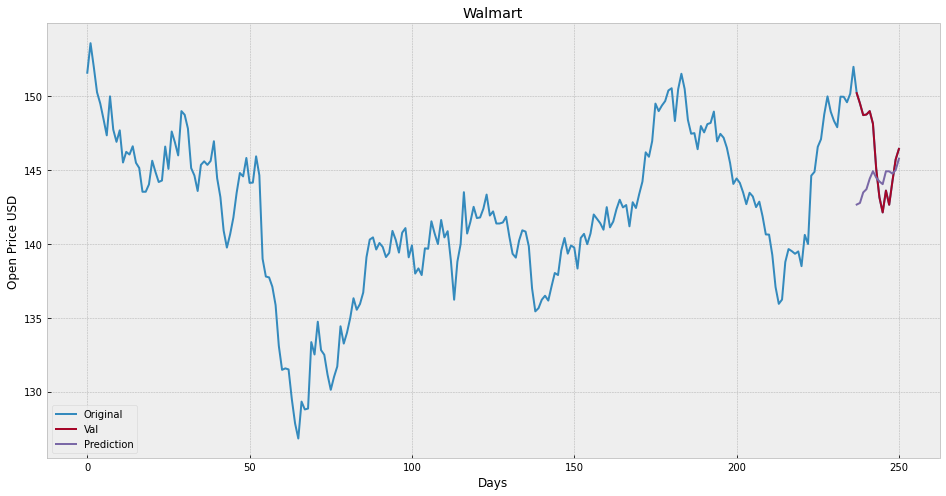

In [35]:
predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Walmart')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [36]:
uploaded2 = files.upload()
data2 = pd.read_csv(io.BytesIO(uploaded2['aapl_data.csv']))
data2.head()
print(data2.shape)

Saving aapl_data.csv to aapl_data (1).csv
(251, 7)


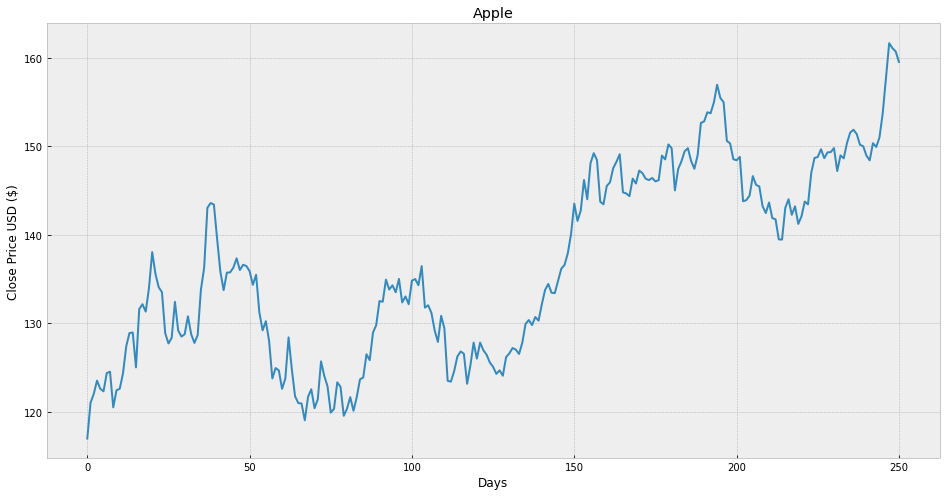

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          Open  Prediction
0   116.970001  128.960007
1   121.010002  125.019997
2   122.019997  131.610001
3   123.519997  132.160004
4   122.599998  131.320007
5   122.309998  133.990005
6   124.370003  138.050003
7   124.529999  135.580002
8   120.500000  134.080002
9   122.430000  133.520004
10  122.599998  128.889999
11  124.339996  127.720001
12  127.410004  128.360001
13  128.899994  132.429993
14  128.960007  129.190002
15  125.019997  128.500000
16  131.610001  128.759995
17  132.160004  130.800003
18  131.320007  128.779999
19  133.990005  127.779999
20  138.050003  128.660004
21  135.580002  133.800003
22  134.080002  136.279999
23  133.520004  143.070007
24  128.889999  143.600006
25  127.720001  143.429993
26  128.360001  139.520004
27  132.429993  135.830002
28  129.190002  133.750000
29  128.500000  135.729996
[[116.970001]
 [121.010002]
 [122.019997]
 [123.519997]
 [122.599998]
 [122.309998]
 [124.370003]
 [124.529999]
 [120.5     ]
 [122.43    ]
 [122.599998]
 [124.339

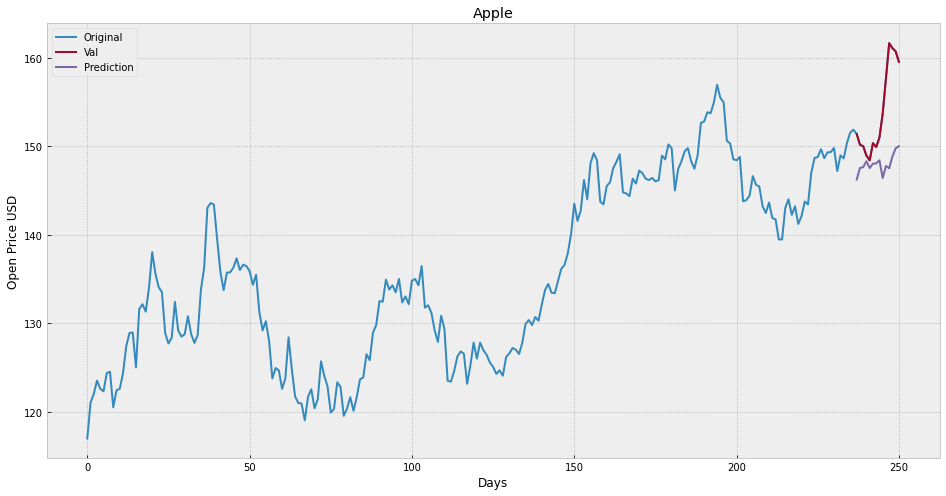

In [37]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data2['Open'])
plt.show()

test = data2[['Open']]

coming_up = 14
test['Prediction'] = test[['Open']].shift(-coming_up)
print(test.head(30))

x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
print(x)

y = np.array(test['Prediction'])[:-coming_up]
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)
print(x_future)

predictions = lr_prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [38]:
uploaded3 = files.upload()
data3 = pd.read_csv(io.BytesIO(uploaded3['tgt_data.csv']))
data3.head()
print(data3.shape)

Saving tgt_data.csv to tgt_data.csv
(250, 7)


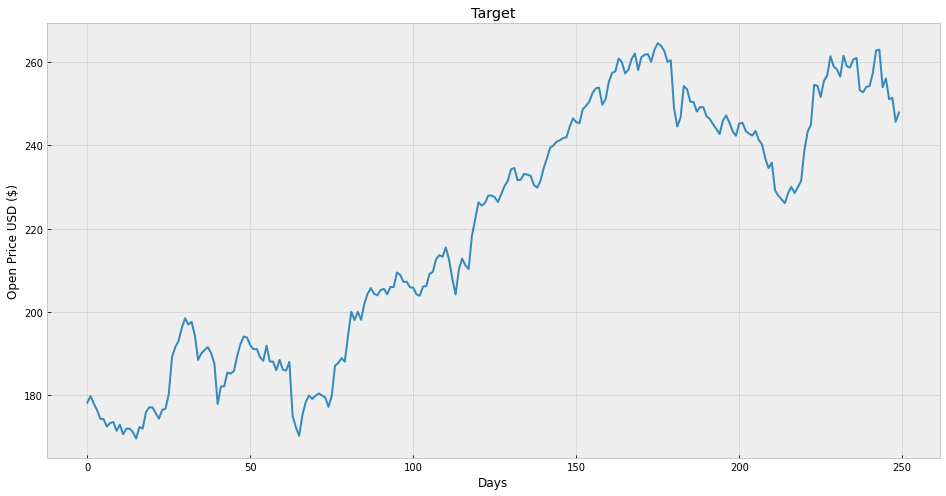

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          Open  Prediction
0   178.250000  171.179993
1   179.809998  169.630005
2   178.020004  172.399994
3   176.470001  172.009995
4   174.380005  175.979996
5   174.270004  177.110001
6   172.500000  177.110001
7   173.350006  175.699997
8   173.589996  174.410004
9   171.500000  176.509995
10  172.960007  176.800003
11  170.649994  180.330002
12  172.009995  189.210007
13  172.000000  191.580002
14  171.179993  193.039993
15  169.630005  196.169998
16  172.399994  198.520004
17  172.009995  196.990005
18  175.979996  197.649994
19  177.110001  194.419998
20  177.110001  188.500000
21  175.699997  190.100006
22  174.410004  190.899994
23  176.509995  191.559998
24  176.800003  190.110001
25  180.330002  187.610001
26  189.210007  177.929993
27  191.580002  182.119995
28  193.039993  182.179993
29  196.169998  185.500000
[[178.25    ]
 [179.809998]
 [178.020004]
 [176.470001]
 [174.380005]
 [174.270004]
 [172.5     ]
 [173.350006]
 [173.589996]
 [171.5     ]
 [172.960007]
 [170.649

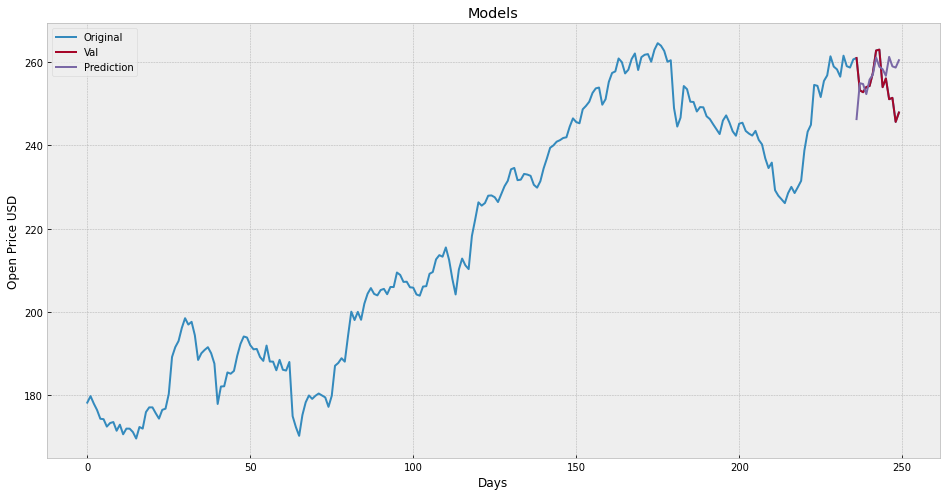

In [39]:
plt.figure(figsize=(16,8))
plt.title('Target')
plt.xlabel('Days')
plt.ylabel('Open Price USD ($)')
plt.plot(data3['Open'])
plt.show()

test = data3[['Open']]

coming_up = 14
test['Prediction'] = test[['Open']].shift(-coming_up)
print(test.head(30))

x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
print(x)

y = np.array(test['Prediction'])[:-coming_up]
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)
print(x_future)

predictions = lr_prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Models')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()